In [40]:
library(readxl)
library(data.table)
library(ggplot2)
library(ggprism)
library(ggforce)
library(ggetho)
library(ggsignif)
source("plot.R", local = T)
source("Cbind.R", local = T)

In [41]:
data <- data.table::fread(file = "tidy_data_wide.csv")

In [42]:
experiments <- c("24hr LTM")
wild_types <- c("Iso31", "MB010B.(II)SPARC-Chrimson ISO", "MB010B.(II)SPARC-GFP ISO")

data <- data[(experiment %in% experiments & Genotype %in% wild_types & Training == "6X_Spaced"),]
panel5_data <-data[region_id!="NONE",]


In [43]:
unique(panel5_data$interval)

[1] "NONE"      "ZT05-ZT24" "ZT12-ZT18" "ZT05-ZT11"

In [44]:

intervals <- c("NONE", "ZT05-ZT11", "ZT12-ZT18", "ZT05-ZT24")

panel5_data[, interval := factor(interval, levels=intervals)]


In [46]:
A <- panel5_data[interval=="NONE",.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)]
B <- panel5_data[interval=="ZT05-ZT11",.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)]
C <- panel5_data[interval=="ZT12-ZT18",.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)]
D <- panel5_data[interval=="ZT05-ZT24",.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)]
Ad <- A[, (delta = POST-PRE)]
Bd <- B[, (delta = POST-PRE)]
Cd <- C[, (delta = POST-PRE)]
Dd <- D[, (delta = POST-PRE)]
X<-Cbind(Ad, Bd, Cd, Dd)
colnames(X) <- intervals
print(paste(
    nrow(A),
    nrow(B),
    nrow(C),
    nrow(D)  
))

[1] "20 21 23 11"


In [49]:
data.table::fwrite(x = A, file="prism/Figure_5_NO_SD.csv")
data.table::fwrite(x = B, file="prism/Figure_5_ZT05-ZT11.csv")
data.table::fwrite(x = C, file="prism/Figure_5_ZT12-ZT18.csv")
data.table::fwrite(x = D, file="prism/Figure_5_ZT05-ZT24.csv")
data.table::fwrite(x = X, file="prism/Figure_5_boxplot.csv")

In [47]:
panel5_data_long <- melt(panel5_data, measure.vars = c("PRE", "POST"), value.name = "PI", variable.name = "test")

In [48]:
panel5_data_long[Genotype=="Iso31" & test == "POST", .N, by=interval]

interval,N
<fct>,<int>
NONE,20
ZT05-ZT24,11
ZT12-ZT18,23
ZT05-ZT11,21


[1] -1.02  0.75


Warning message in geom_signif(data = annotation_df, aes(annotations = stars), xmin = 1, :
“Ignoring unknown aesthetics: annotations”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


$gg

$n_facets
[1] 4

$direction
[1] "horizontal"


Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


png 
  2

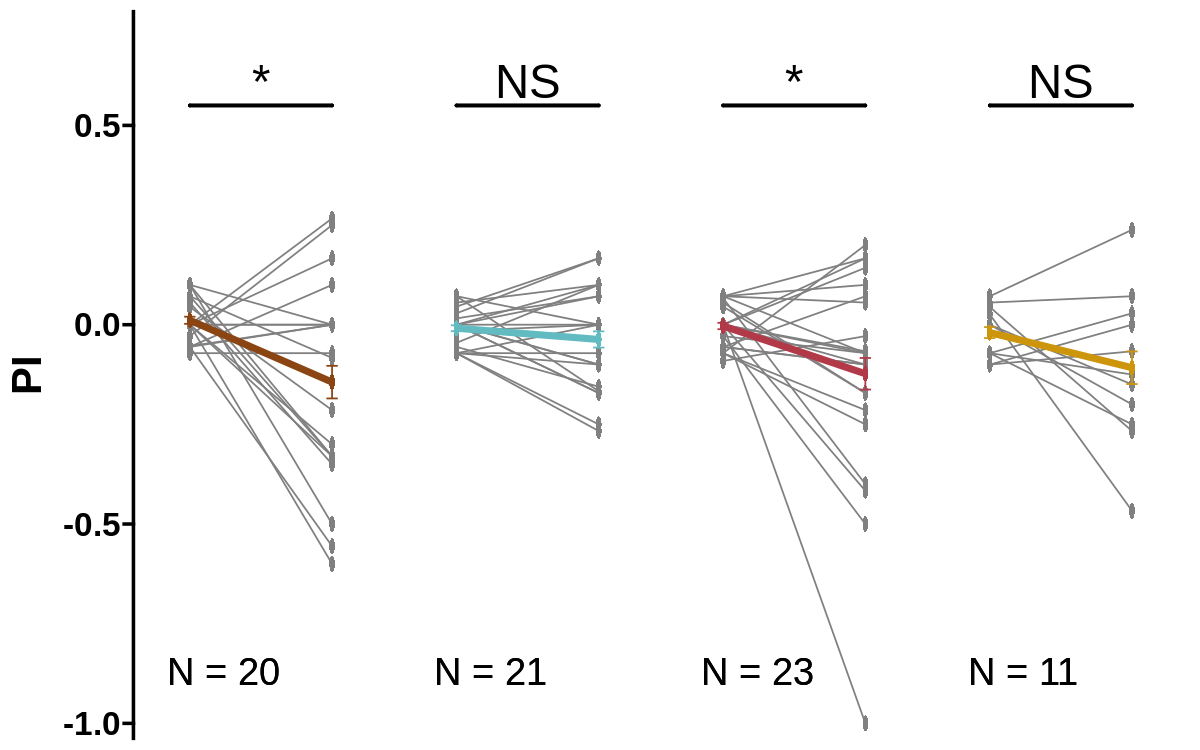

In [32]:
ratio=2.5
size_unit=2.5
panel5 <- learning_plot(
    panel5_data_long, "interval",
    map_signif_level=TRUE, test=paired_t_test,
    colors=colors_panel5[c(1,2,3, 4)], starsize=10,
    y_annotation=0.55, textsize=8,
    y_limits=c(-1, 0.75),
    hjust_text=0.2
)
options(repr.plot.width=size_unit*panel5$n_facets, repr.plot.height=size_unit*ratio)
panel5
save_learning_plot(plot=panel5, filename = "figures/panel5A.svg", ratio=ratio, size_unit = size_unit)

Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


$gg

$n_facets
[1] 4


Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


png 
  2

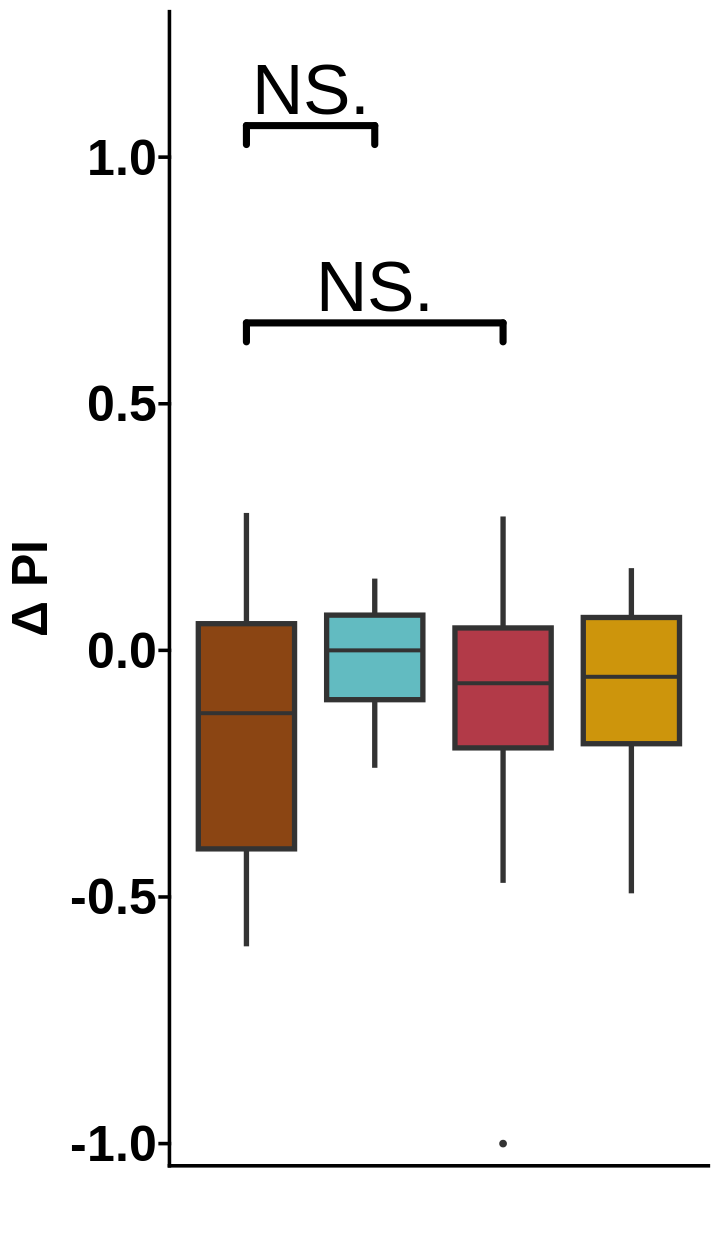

In [33]:
size_unit=1.5
ratio=7
panel5B <- summary_plot(
    data=panel5_data_long, "interval",
    comparisons=list(
        # c("ZT05-ZT11", "ZT12-ZT18"),
        # c("ZT12-ZT18", "No SD"),
        c("ZT05-ZT11", "NONE"),
        c("ZT12-ZT18", "NONE")
    ),
    annotation_y=c(1, 0.6),
    test=unpaired_t_test,
    colors=colors_panel5[c(1,2,3,4)],
    y_limits=c(-1, 1.25),
    text_y_size=30,
    title_y_size=30
)

panel5B$gg <- panel5B$gg + theme(
    axis.ticks.x = element_blank(), axis.text.x = element_blank()
)
options(repr.plot.width=size_unit*panel5B$n_facets, repr.plot.height=size_unit*ratio)
panel5B
save_summ_plot(plot=panel5B, filename = "figures/panel5B.svg", ratio=ratio, size_unit = size_unit)